<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Clustering/Agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import and load the data

path = '/content/drive/MyDrive/datasets/Mall_Customers.csv'
df = pd.read_csv(path)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check for missing values

df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# slice data based on income and spending score

df = df[['Annual Income (k$)','Spending Score (1-100)']]

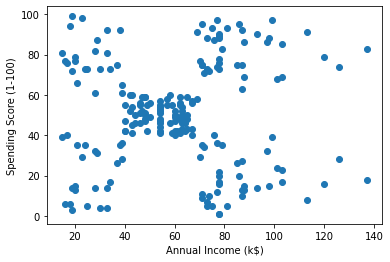

In [7]:
# plot the data

plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [11]:
# scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

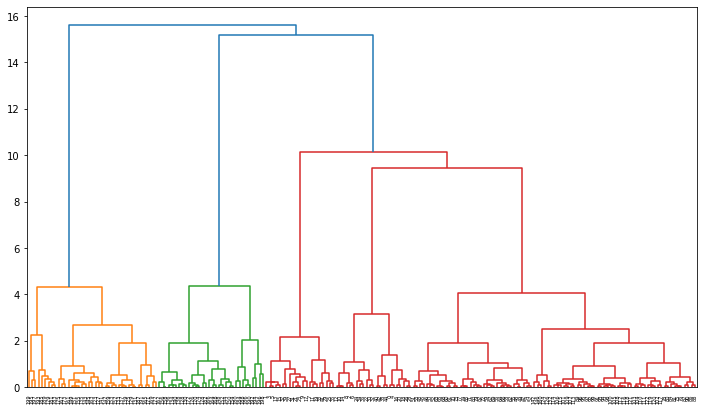

In [17]:
# plot the dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage

linkage = linkage(df_scaled,method='ward')

plt.figure(figsize=(12,7))

dend = dendrogram(linkage)

plt.show()

**The number of clusters can be 3 or 5**

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for i in range(3,6):
    ag = AgglomerativeClustering(n_clusters=i)
    y_pred = ag.fit_predict(df_scaled)

    print('The silhouttescore for {} clusters is {}'.format(i,silhouette_score(df_scaled,y_pred)))

The silhouttescore for 3 clusters is 0.4610481446570447
The silhouttescore for 4 clusters is 0.4925507715349343
The silhouttescore for 5 clusters is 0.5538089226688662


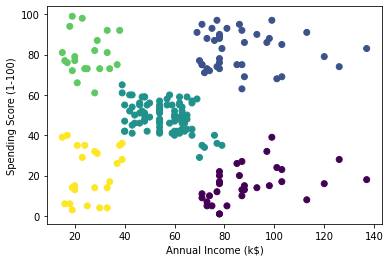

In [23]:
# plot the data with cluster information

plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y_pred)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

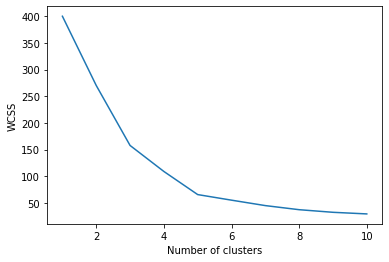

In [24]:
# make kmeans model

from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)

    wcss.append(kmeans.inertia_)

# plot the elbow curve

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The elbow is formed at cluster 5**

In [25]:
# run the model with 5 clusters

kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(df_scaled)

print('The silhoutte score is ',silhouette_score(df_scaled,y_pred))

The silhoutte score is  0.5546571631111091


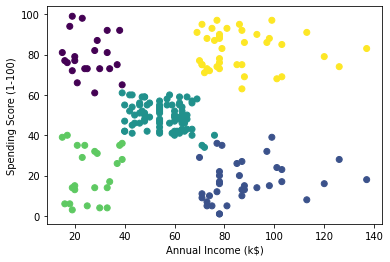

In [26]:
# plot the data with cluster information

plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y_pred)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [32]:
# score with other cluster size

for i in range(2,7):

    kmeans = KMeans(n_clusters=i)
    y_pred = kmeans.fit_predict(df_scaled)

    print('The silhoutte score is for {num} clusters is'.format(num=i),silhouette_score(df_scaled,y_pred))

The silhoutte score is for 2 clusters is 0.2932903073400333
The silhoutte score is for 3 clusters is 0.46658474419000145
The silhoutte score is for 4 clusters is 0.4939069237513199
The silhoutte score is for 5 clusters is 0.5546571631111091
The silhoutte score is for 6 clusters is 0.5394911417553498
